# Code to find NEST for which MULTG fesults are stable

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
from scipy.optimize import curve_fit
from pathlib import Path
import fileinput

import os
import subprocess
 
# change the current directory
# to specified directory
os.chdir(r"/home/simo/Scrivania/Thesis/7C2_Analysis/Multg")


In [19]:
def read_dat_file(filename,skip):
    data = np.loadtxt(filename+'.dat',skiprows= skip,encoding='unicode_escape') #utf-8-sig')
    col = []
    num = len(data.transpose())
    for i in range(num):
        if num == len(data):
            col1 = data[i]
        else:
            col1 = data[:,i]
        col.append(col1)

    return col

def write_line(file_name:str, line:int, content:str):
  line -= 1 # Python starts counting at 0, but people start counting at one. This accounts for that.
  with open(file_name, "r") as file: # Open the file in read mode
    lines = file.readlines() # Assign the file as a list to a variable
    lines[line] = content + "\n" # Replace the proper line with the provided content
  with open(file_name, "w") as file: # Open the file in write mode
    file.write("".join(lines)) # Write the modified content to the file

Study how the obtained $T_m$, $\gamma$ and $m$ vary with the number of extractions NEST. Study at 350 k

Import $\mu$ and $T$ values

In [20]:
T = read_dat_file('mu',1)[0]
mu_geo2_s = read_dat_file('mu',1)[1]
mu_geo2_a = read_dat_file('mu',1)[2]
mu_v_s = read_dat_file('mu',1)[3]
mu_v_a = read_dat_file('mu',1)[4]


In [21]:
angle = [20, 40, 60, 80, 100]

write_line('FORT4',3,'0.4       '+ str(mu_geo2_s[0])+'    '+str(mu_geo2_a[0]))
write_line('FORT4',5,'0.55      '+ str(mu_v_s[0])+'    '+str(mu_v_a[0]))
write_line('FORT4',9, str(len(angle))+'.')
for i in range(len(angle)):
    write_line('FORT4',10+i,str(angle[i])+'.')

trasm = []
emme = []
gamma = []

N = np.logspace(5,np.log10(5e6),40)

for i in range(len(N)):
    N[i] = int(N[i])

for i in range(len(N)):
    print('NEST=', N[i])
       
    write_line('FORT4',7,str(N[i]))

    proc = subprocess.Popen(["./MULTG"], shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    output =  proc.communicate()[0]
    
    Tm = read_dat_file('OUTPUT',1)[1]
    m = read_dat_file('OUTPUT',1)[2]
    g = read_dat_file('OUTPUT',1)[3]

    trasm.append(Tm)
    emme.append(m)
    gamma.append(g)



NEST= 100000.0
NEST= 110551.0
NEST= 122215.0
NEST= 135110.0
NEST= 149366.0
NEST= 165126.0
NEST= 182549.0
NEST= 201810.0
NEST= 223103.0
NEST= 246643.0
NEST= 272667.0
NEST= 301437.0
NEST= 333242.0
NEST= 368403.0
NEST= 407273.0
NEST= 450246.0
NEST= 497752.0
NEST= 550271.0
NEST= 608331.0
NEST= 672517.0
NEST= 743475.0
NEST= 821920.0
NEST= 908643.0
NEST= 1004515.0
NEST= 1110503.0
NEST= 1227674.0
NEST= 1357208.0
NEST= 1500410.0
NEST= 1658720.0
NEST= 1833735.0
NEST= 2027215.0
NEST= 2241110.0
NEST= 2477574.0
NEST= 2738987.0
NEST= 3027982.0
NEST= 3347469.0
NEST= 3700666.0
NEST= 4091130.0
NEST= 4522792.0
NEST= 4999999.0


#### Stablity of parameters @ T = 350 K ###


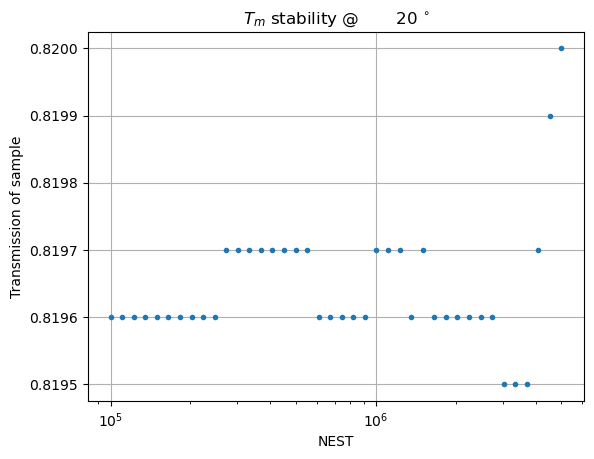

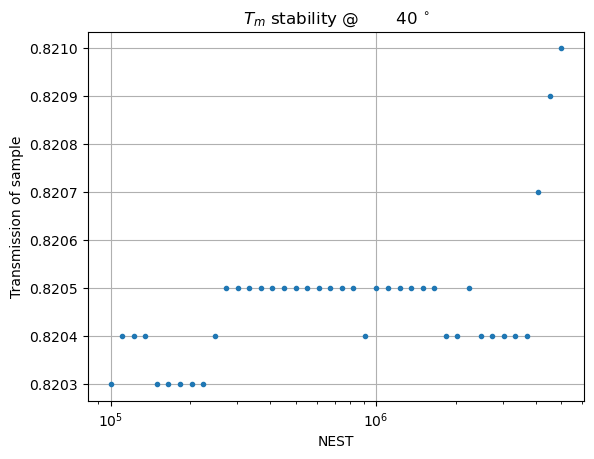

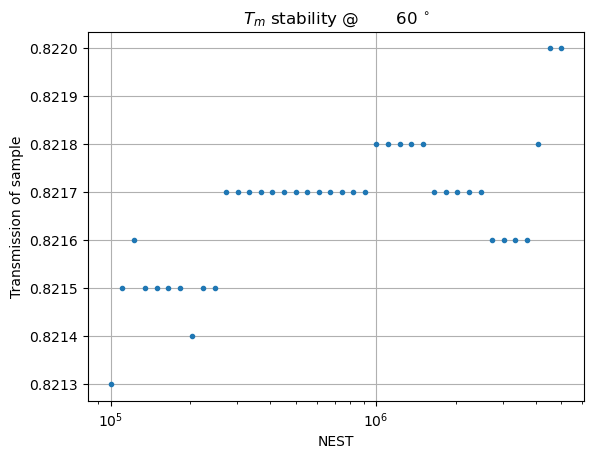

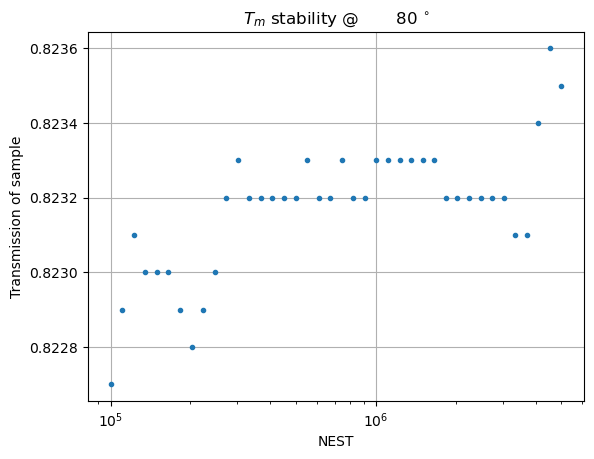

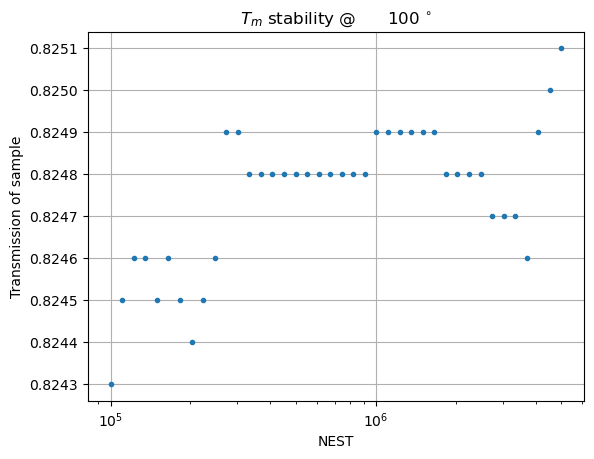

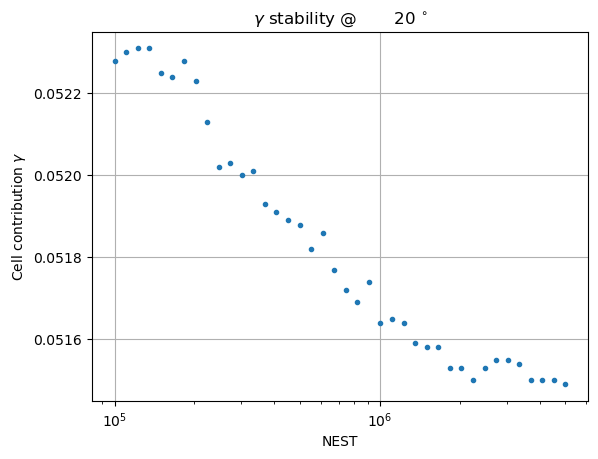

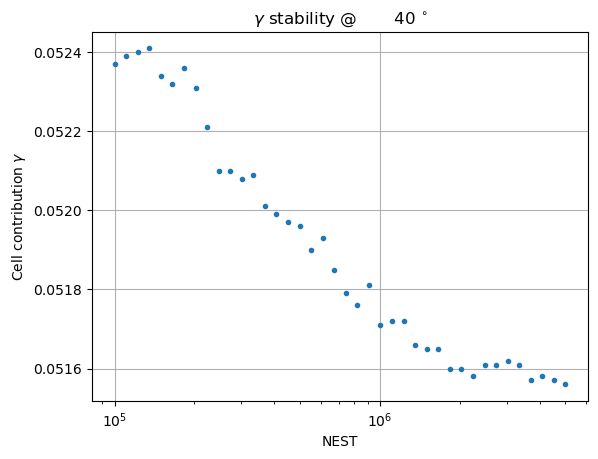

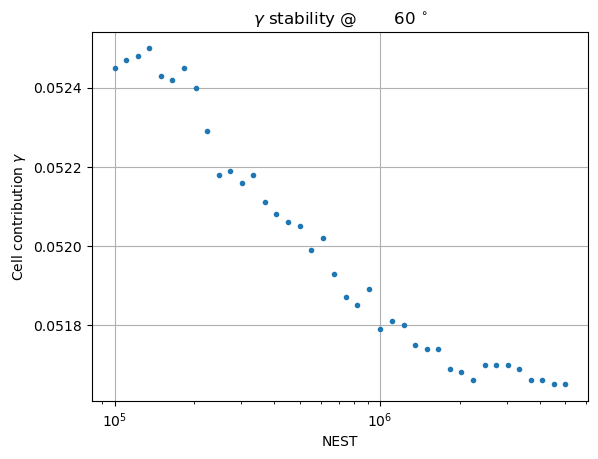

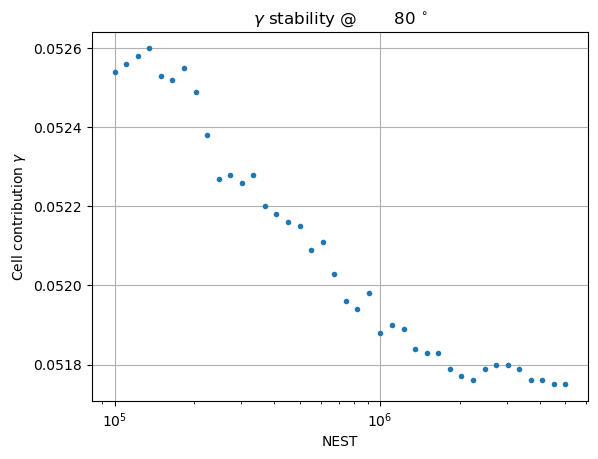

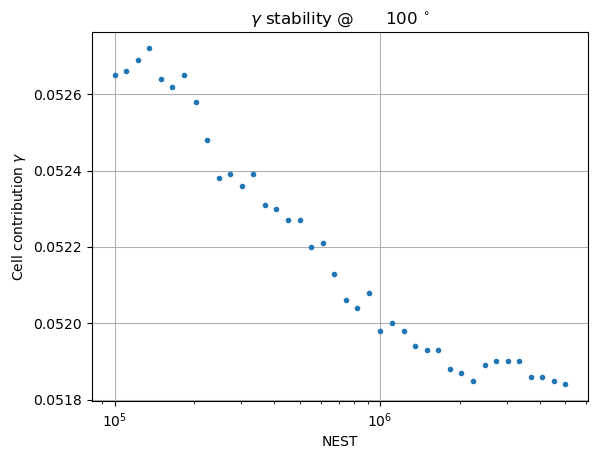

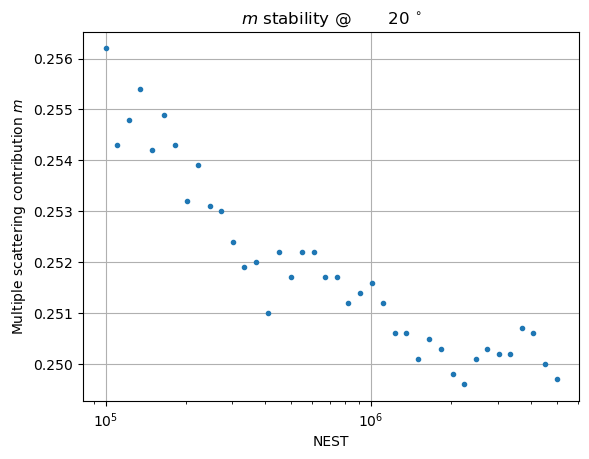

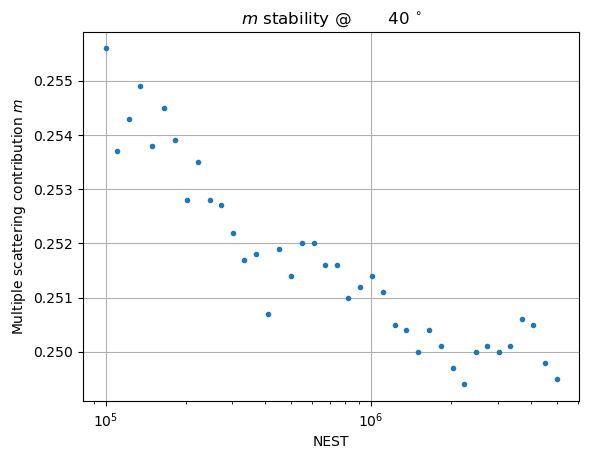

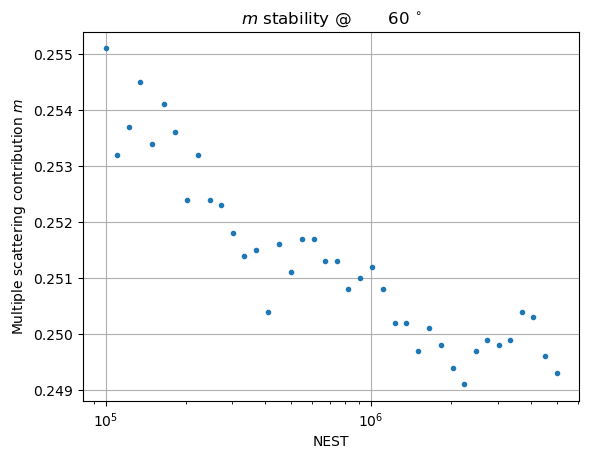

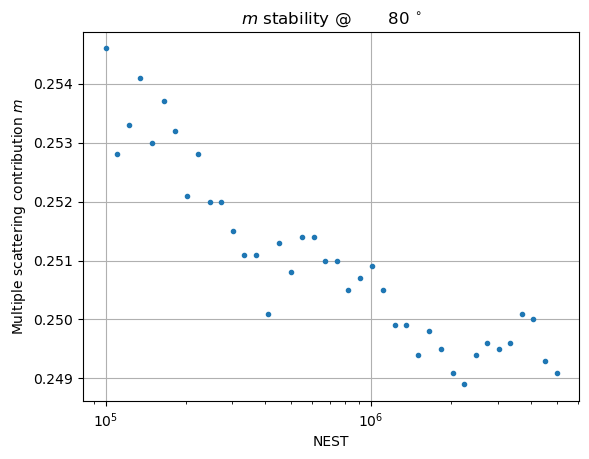

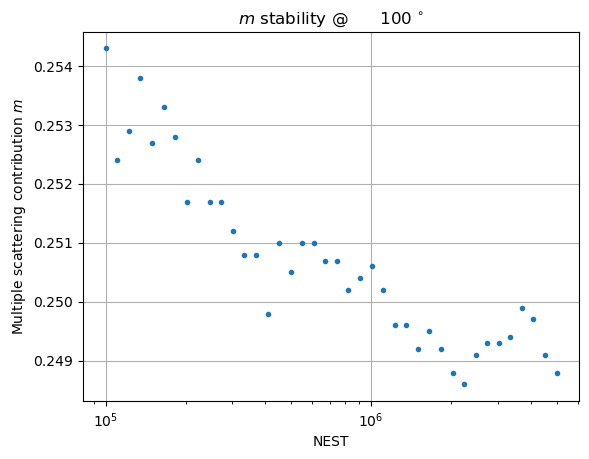

In [22]:
def column(matrix, i):
    return [row[i] for row in matrix]

print('#### Stablity of parameters @ T = 350 K ###')

for i in range(len(angle)):
    plt.plot(N,column(trasm,i),'.')
    plt.xlabel('NEST')
    plt.ylabel('Transmission of sample')
    plt.title(r'$T_m$ stability @ %8.0f $^{\circ}$' %angle[i])
    plt.grid()
    plt.xscale('log')
    plt.show()

for i in range(len(angle)):
    plt.plot(N,column(gamma,i),'.')
    plt.xlabel('NEST')
    plt.ylabel(r'Cell contribution $\gamma$')
    plt.title(r'$\gamma$ stability @ %8.0f $^{\circ}$' %angle[i])
    plt.grid()
    plt.xscale('log')
    plt.show()

for i in range(len(angle)):
    plt.plot(N,column(emme,i),'.')
    plt.xlabel('NEST')
    plt.ylabel(r'Multiple scattering contribution $m$')
    plt.title(r'$m$ stability @ %8.0f $^{\circ}$' %angle[i])
    plt.grid()
    plt.xscale('log')
    plt.show()